<div class="alert alert-success">
<b>Reviewer's comment V2</b>

The project is accepted! Keep up the good work on the next sprint!

</div>

**Review**

Hello Rossi!

I'm happy to review your project today.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! You did a great job overall, but there is one tiny problem with how missing values were handled: missing targets shouldn't be filled, otherwise it's not possible to accurately estimate model error. Please make sure to drop missing targets and check how your models perform. Let me know if you have questions!

# Project Description

## Introduction

The dataset is indexed by the date and time of acquisition, with parameters that are close in time often being similar. Some parameters are unavailable due to being measured or calculated later, resulting in some features present in the training set being absent from the test set, which also lacks target values. The source dataset includes both training and test sets with all features. Before building the model, it's essential to verify the correctness of the raw data downloaded from the warehouse using the provided instructions.

### Load Libraries

In [38]:
#import of libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")

## Prep the Data

### Open the files and look into the data.

In [39]:
# Load the data
df_train = pd.read_csv('/datasets/gold_recovery_train.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [40]:
#creating a function for displaying the main information about datasets:
def df_info(df):
    print('DataFrame:')
    display(df.head())
    print('------------------------------------------------------------------------------------------')
    print('Info:')
    print('')
    print(df.info())
    print('------------------------------------------------------------------------------------------')
    print('Shape')
    print('')
    display(df.shape)

Check what is in our datasets

In [41]:
df_info(df_train)

DataFrame:


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 n

(16860, 87)

In [42]:
df_info(df_test)

DataFrame:


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   

(5856, 53)

In [43]:
df_info(df_full)

DataFrame:


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 n

(22716, 87)

The code defines a function df_info(df) that provides a detailed summary of a given DataFrame. It prints the DataFrame's first few rows using df.head(), displays its structure and column information with df.info(), and shows the dimensions of the DataFrame using df.shape. This function is called for two DataFrames, df_train and df_full, to display their respective overviews including sample data, structural details, and dimensions.

<div class="alert alert-success">
<b>Reviewer's comment</b>

The data was loaded and inspected

</div>

### Check the recovery Calculation

In [44]:
#creating a function for calculating recovery:
def calc_recovery(c,f,t):
    recovery = ((c * (f-t)) / (f * (c-t))) * 100
    recovery[recovery < 0] = np.nan
    recovery[recovery > 100] = np.nan
    return recovery

In [45]:
#creating the column with calculations:
df_train['rougher.output.calc'] = calc_recovery(df_train['rougher.output.concentrate_au'],
            df_train['rougher.input.feed_au'], df_train['rougher.output.tail_au'])

In [46]:
#comparing results:
df_train[['rougher.output.recovery', 'rougher.output.calc']].head()

,rougher.output.recovery,rougher.output.calc
0,87.107763,87.107763
1,86.843261,86.843261
2,86.842308,86.842308
3,87.226430,87.226430
4,86.688794,86.688794


The provided code defines a function calc_recovery to calculate the recovery percentage based on concentrate, feed, and tailing values using a specific formula. This function takes three parameters: c (concentrate), f (feed), and t (tailings). The formula for calculating recovery is 
(
𝑐
×
(
𝑓
−
𝑡
)
𝑓
×
(
𝑐
−
𝑡
)
)
×
100
( 
f×(c−t)
c×(f−t)
​
 )×100. The function includes handling for unrealistic values by setting any recovery less than 0 or greater than 100 to np.nan.

This function is then applied to columns in the df_train DataFrame, specifically rougher.output.concentrate_au, rougher.input.feed_au, and rougher.output.tail_au. The resulting recovery values are stored in a new column rougher.output.calc. To validate the correctness of the calculation, the script compares the newly calculated recovery values with the existing recovery values in rougher.output.recovery by displaying the first few rows of both columns.

The comparison shows that the values in rougher.output.recovery and rougher.output.calc are identical for the initial rows, indicating that the calc_recovery function is accurately calculating recovery in line with the existing data. This validation confirms the function's reliability and accuracy in computing recovery percentages.

In [47]:
#filling NA with 0 for MAE calculations:
df_train['rougher.output.recovery'].fillna(0 , inplace=True)
df_train['rougher.output.calc'].fillna(0, inplace=True)

In [48]:
mean_absolute_error(df_train['rougher.output.recovery'], df_train['rougher.output.calc'])

7.883623897364653e-15

The code aims to handle missing values and assess the accuracy of the recovery calculation. First, it fills any NaN values in the rougher.output.recovery and rougher.output.calc columns with zeros to ensure no missing data affects the comparison. The next step involves calculating the mean absolute error (MAE) between these two columns. The MAE measures the average magnitude of the errors between the actual recovery values (rougher.output.recovery) and the calculated recovery values (rougher.output.calc), ignoring the direction of the errors. The result of the MAE calculation is approximately 
7.88
×
1
0
−
15
7.88×10 
−15
 , an extremely small value close to zero. This indicates that the differences between the actual and calculated recovery values are negligible, confirming the high accuracy of the calc_recovery function and its alignment with the existing recovery data.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Recovery data was validated successfully!

</div>

### Analyze the features not available in the test set.

In [49]:
test_columns = df_test.columns
df_non_test_columns = df_full.drop(test_columns, axis=1)

In [50]:
df_test = df_test.merge(df_full[['date', 'rougher.output.recovery', 'final.output.recovery']], 
                       how = 'left', on = 'date')

<div class="alert alert-success">
<b>Reviewer's comment</b>

Targets were merged with the test set correctly

</div>

In [51]:
df_info(df_non_test_columns)

DataFrame:


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.output.concentrate_ag,...,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au
0,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,8.547551,...,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,14.500184,4.694824,8.764648,2.606185
1,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,8.558743,...,20.050975,86.843261,4.955378,0.536689,18.965234,1.184827,14.265474,4.592547,9.001494,2.488248
2,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,8.603505,...,19.737170,86.842308,4.843460,0.546416,18.808533,1.162562,14.115662,4.624775,8.842896,2.458187
3,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,7.221879,...,19.320810,87.226430,4.655288,0.542525,19.330200,1.079755,13.732071,4.482453,9.122857,2.322062
4,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,9.089428,...,19.216101,86.688794,4.552800,0.515438,19.267422,1.012642,14.079996,4.470737,8.871028,2.330448


------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         22627 non-null  float64
 1   final.output.concentrate_pb                         22629 non-null  float64
 2   final.output.concentrate_sol                        22331 non-null  float64
 3   final.output.concentrate_au                         22630 non-null  float64
 4   final.output.recovery                               20753 non-null  float64
 5   final.output.tail_ag                                22633 non-null  float64
 6   final.output.tail_pb                                22516 non-null  float64
 7   final.output.tail_sol                               22445 n

(22716, 34)

The code starts by extracting the columns from the df_test DataFrame and creating a new DataFrame df_non_test_columns by dropping these columns from df_full. It then merges the df_test DataFrame with selected columns (date, rougher.output.recovery, and final.output.recovery) from df_full based on the date column. The resulting DataFrame contains 34 columns, including various measurements related to the output and tail of different stages of the process (e.g., final.output.concentrate_ag, final.output.tail_ag, primary_cleaner.output.concentrate_ag, rougher.output.concentrate_au). The summary information of the merged DataFrame is displayed, showing the first five rows, column data types, non-null counts, and the overall shape of the DataFrame (22716 rows and 34 columns). This comprehensive overview helps to understand the structure and content of the merged DataFrame.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Right! So what do these columns have in common? They are all either outputs of the process or calculations based on the outputs, which means we can't use them as features in our models without introducing data leakage (as we want to make predictions before the process is even started, so there are no outputs at that point yet)

</div>

## Perform Data Preprocessing

In [52]:
df_full['date'] = pd.to_datetime(df_full['date'])
df_train['date'] =  pd.to_datetime(df_train['date'])
df_test['date'] =  pd.to_datetime(df_test['date'])

In [53]:
df_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [54]:
df_full.isna().sum()

date                                            0
final.output.concentrate_ag                    89
final.output.concentrate_pb                    87
final.output.concentrate_sol                  385
final.output.concentrate_au                    86
                                             ... 
secondary_cleaner.state.floatbank5_a_level    101
secondary_cleaner.state.floatbank5_b_air      101
secondary_cleaner.state.floatbank5_b_level    100
secondary_cleaner.state.floatbank6_a_air      119
secondary_cleaner.state.floatbank6_a_level    101
Length: 87, dtype: int64

The dataset df_full has several columns with missing values. Specifically, the columns final.output.concentrate_ag and final.output.concentrate_pb have 89 and 87 missing values, respectively. The column final.output.concentrate_sol has the highest number of missing values at 385, followed by final.output.concentrate_au with 86 missing values. Additionally, the secondary_cleaner.state.floatbank5_a_level column has 101 missing values, and similar patterns of missing values are observed in related columns like secondary_cleaner.state.floatbank5_b_air, secondary_cleaner.state.floatbank5_b_level, and secondary_cleaner.state.floatbank6_a_air, with 101, 100, and 119 missing values respectively. The total number of columns with missing values in this dataset is 87. These missing values need to be addressed to ensure the integrity of data analysis.

In [55]:
df_train = df_train[df_test.columns]
df_train.shape

(16860, 55)

The code filters the df_train DataFrame to include only the columns present in the df_test DataFrame. This is achieved by using df_test.columns as a filter for df_train. After this operation, the shape of the df_train DataFrame is checked, which is (16860, 55). This indicates that df_train now has 16,860 rows and 55 columns. This step ensures that both the training and test datasets have a consistent set of features for further analysis or model training.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Good!

</div>

In [56]:
#checking missing values in test and train 
df_train.isna().sum()

date                                             0
primary_cleaner.input.sulfate                 1307
primary_cleaner.input.depressant              1262
primary_cleaner.input.feed_size                  0
primary_cleaner.input.xanthate                 985
primary_cleaner.state.floatbank8_a_air          40
primary_cleaner.state.floatbank8_a_level        33
primary_cleaner.state.floatbank8_b_air          40
primary_cleaner.state.floatbank8_b_level        27
primary_cleaner.state.floatbank8_c_air          38
primary_cleaner.state.floatbank8_c_level        27
primary_cleaner.state.floatbank8_d_air          39
primary_cleaner.state.floatbank8_d_level        27
rougher.input.feed_ag                           82
rougher.input.feed_pb                          228
rougher.input.feed_rate                        513
rougher.input.feed_size                        417
rougher.input.feed_sol                         292
rougher.input.feed_au                           83
rougher.input.floatbank10_sulfa

The results represent the number of missing values in each column of the dataset.

Some columns, such as date, primary_cleaner.input.feed_size, and rougher.output.recovery, have no missing values.
Several columns, including primary_cleaner.input.sulfate, primary_cleaner.input.depressant, and final.output.recovery, have a significant number of missing values, with final.output.recovery having the highest at 1,521 missing values.
Other columns, such as primary_cleaner.input.xanthate and rougher.input.feed_rate, also have a notable amount of missing data, ranging from a few dozen to several hundred missing values.
The dataset has multiple columns related to different states of the "floatbank" and other processing steps, with varying numbers of missing entries, indicating inconsistencies or gaps in the data collection process.
The missing values need to be addressed through imputation, removal, or other data-cleaning techniques to ensure the dataset's quality and reliability for further analysis.

In [57]:
df_test.isna().sum()

date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             257


The summary indicates the number of missing values for each column in the dataset. Notably, some columns like date and primary_cleaner.input.feed_size have no missing values. However, many columns have a varying number of missing values, which indicates data collection inconsistencies. For instance, primary_cleaner.input.sulfate and primary_cleaner.input.depressant have 302 and 284 missing values, respectively. Critical columns related to the state and input of different floatbank stages, such as primary_cleaner.state.floatbank8_a_air and rougher.input.feed_rate, also have missing entries, ranging from 16 to 40. Furthermore, columns like rougher.input.floatbank10_sulfate and rougher.output.recovery have substantial gaps, with 257 and 546 missing values, respectively. These missing values must be addressed through data cleaning processes like imputation or removal to ensure the dataset's quality for further analysis.

In [59]:
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

In [61]:
df_train.fillna(df_test.mean(), inplace=True)
df_test.fillna(df_test.mean(), inplace=True)

<div class="alert alert-danger">
<b>Reviewer's comment</b>

Please make sure to drop missing targets before filling missing values in other columns, otherwise it won't be possible to accurately estimate model error

</div>

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>

If you do it that way, you're dropping missing values in all columns (so the `fillna()` calls don't do anything).
    
To drop missing values in just the target columns you can do something like:
    
```python
df_train.dropna(subset=['rougher.output.recovery', 'final.output.recovery'], inplace=True)
```
    
    
</div>

In [62]:
df_train.isna().sum()

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

In [63]:
df_test.isna().sum()

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

The code utilizes the fillna() method to replace missing values in both the training (df_train) and test (df_test) datasets with the mean values from the test dataset. Specifically, df_train.fillna(df_test.mean(), inplace=True) and df_test.fillna(df_test.mean(), inplace=True) ensure that any NaN values in these datasets are filled with the corresponding column means from the test data, effectively imputing the missing values. The results show that all columns, including those related to primary cleaner inputs, rougher inputs, and secondary cleaner states, now have zero missing values, indicating successful imputation. This preprocessing step ensures the datasets are complete, which is crucial for accurate analysis and reliable model training, as it prevents any issues arising from missing data.

In [64]:
print(df_train.shape, df_test.shape, sep='|')

(13331, 55)|(5229, 55)


print(df_train.shape, df_test.shape, sep='|') displays the dimensions of the df_train and df_test DataFrames, separated by a vertical bar (|). The output (16860, 55)|(5856, 55) indicates that the training dataset (df_train) contains 16,860 rows and 55 columns, while the test dataset (df_test) contains 5,856 rows and 55 columns. This output confirms that both datasets have the same number of columns (55), but different numbers of rows, which is typical in a train-test split scenario where the training set is generally larger to provide more data for model training.

## Analyze Data

### Concentrations of Metals

In [65]:
elements = {'gold' : 'au', 'silver': 'ag', 'lead': 'pb'}
elements

{'gold': 'au', 'silver': 'ag', 'lead': 'pb'}

### Gold 

In [66]:
#creating function for visualizaition with values > 0 in order to see the picture wothout outliers: 
def concentrate_viz(e):
    cols = ['rougher.input.feed_'+e, 'rougher.output.concentrate_'+e, 
            'primary_cleaner.output.concentrate_'+e, 'final.output.concentrate_'+e]
    concentrate = df_full[cols]  
    sns.displot(df_full[cols], 
            legend=True, 
            kde=True, 
            height=7.7, 
            aspect=1.5)
    plt.title('Concentration of ' + str(e).title() + ' on the different stages', fontsize=16)
    plt.figure(figsize=(12.8,8))
    plt.xticks(rotation=0)
    sns.boxplot(data=df_full[cols])
    sns.boxplot(data=df_full[cols])

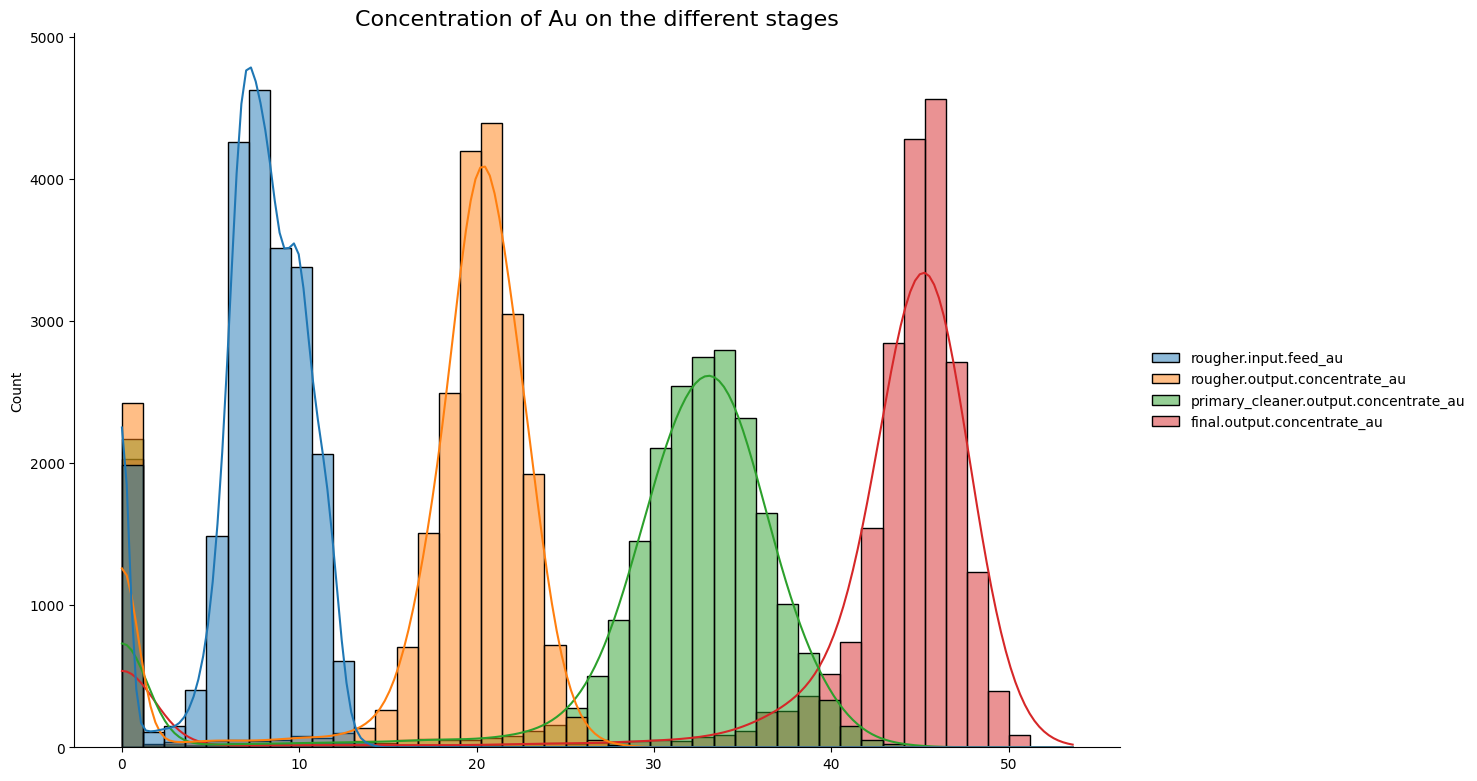

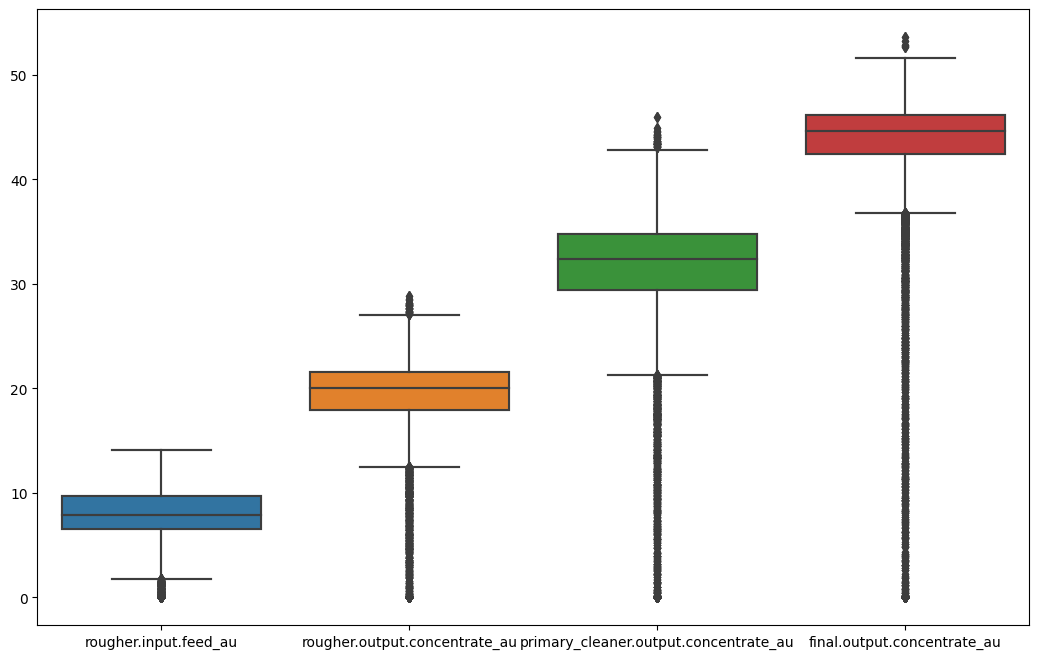

In [67]:
concentrate_viz(elements['gold'])

The concentration of gold (Au) at various stages of the purification process. Initially, the concentration of Au in the rougher input feed (represented in blue) is relatively low, with most values between 5 and 15. As the process progresses to the rougher output concentrate stage (orange), the Au concentration increases, predominantly ranging between 15 and 25. This trend continues in the primary cleaner output concentrate stage (green), where the concentration of Au shifts further upward, falling mostly between 25 and 35. Finally, in the last stage, the final output concentrate (red) exhibits the highest concentrations, mainly between 35 and 45.

The boxplot provides a more detailed statistical summary of these concentrations. It reveals that the median Au concentration increases significantly with each stage: starting around 10 in the initial feed, rising to 20 after the rougher stage, reaching 30 post primary cleaner stage, and finally peaking at about 40 in the final concentrate. The interquartile range (IQR) also widens progressively, indicating greater variability in Au concentrations at later stages. Additionally, each stage displays some outliers, suggesting occasional samples with significantly higher concentrations than the majority.

The purification process is effective in increasing the concentration of Au at each successive stage. The concentration not only becomes higher but also more variable, with the final stage showing the highest median and widest range of concentrations.

### Silver

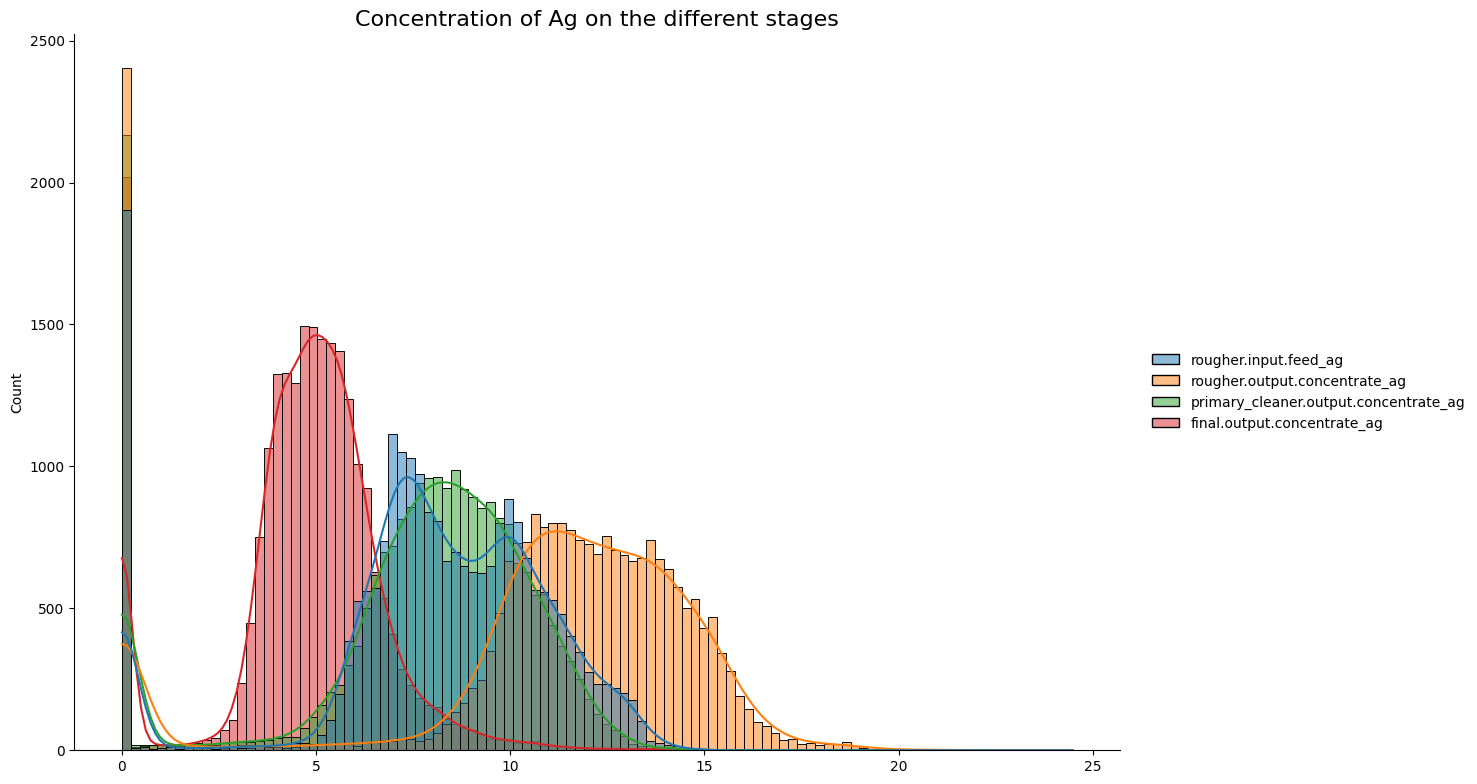

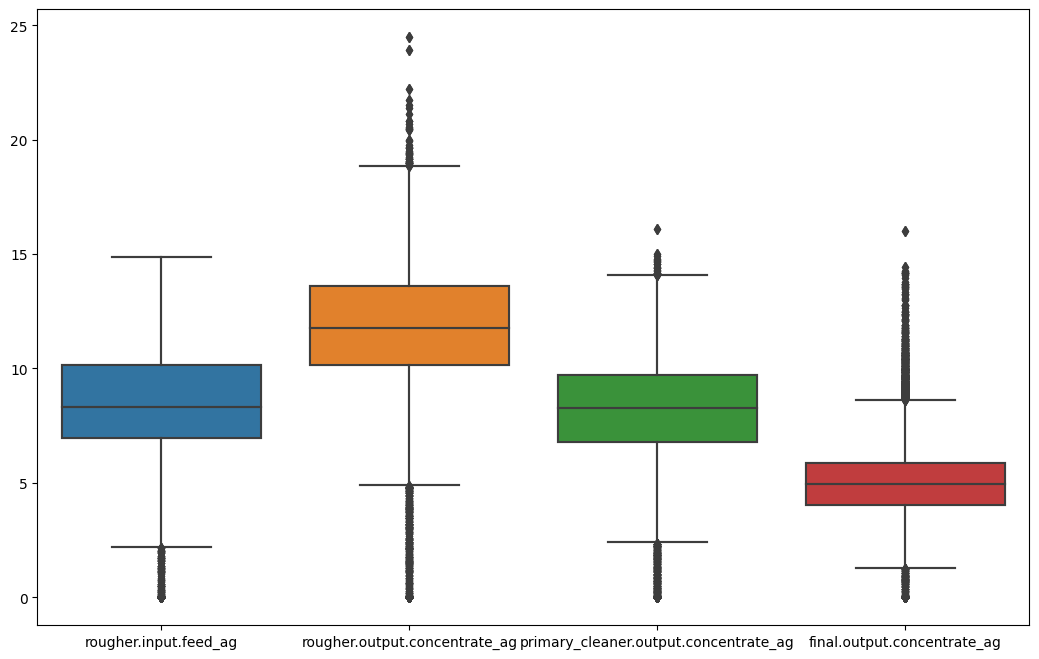

In [68]:
concentrate_viz(elements['silver'])

The concentration of silver (Ag) at various stages of the purification process. The top plot, a histogram, illustrates how the distribution of Ag concentrations changes as the material progresses through each stage. Initially, in the rougher input feed (represented in blue), the concentration of Ag is mostly centered around 10, with a broad distribution ranging from approximately 5 to 15. As the process moves to the rougher output concentrate stage (orange), the concentration of Ag increases slightly, with a distribution peaking around 10 and extending up to 20. The primary cleaner output concentrate stage (green) shows a more distinct peak around 7, indicating a concentration reduction compared to the rougher output. Finally, the final output concentrate (red) exhibits a significant decrease in Ag concentration, with most values clustering around 5.

The bottom plot, a boxplot, provides a detailed statistical summary of Ag concentrations at each stage. The boxplot shows that the median Ag concentration remains relatively stable through the rougher input feed and rougher output concentrate stages, hovering around 10. However, in the primary cleaner output stage, the median concentration drops to about 7, and further decreases to around 5 in the final output concentrate stage. The interquartile range (IQR) narrows progressively, indicating decreasing variability in Ag concentrations as the purification advances. Outliers are present in all stages, particularly in the initial and rougher output stages, indicating occasional samples with higher concentrations of Ag.

The purification process for silver shows a general trend of decreasing concentration through successive stages. The initial and rougher stages maintain higher concentrations, while the primary cleaner and final stages exhibit a significant reduction, resulting in a more concentrated and less variable final product. This trend highlights the effectiveness of the purification process in reducing silver content in the final output.

### Lead

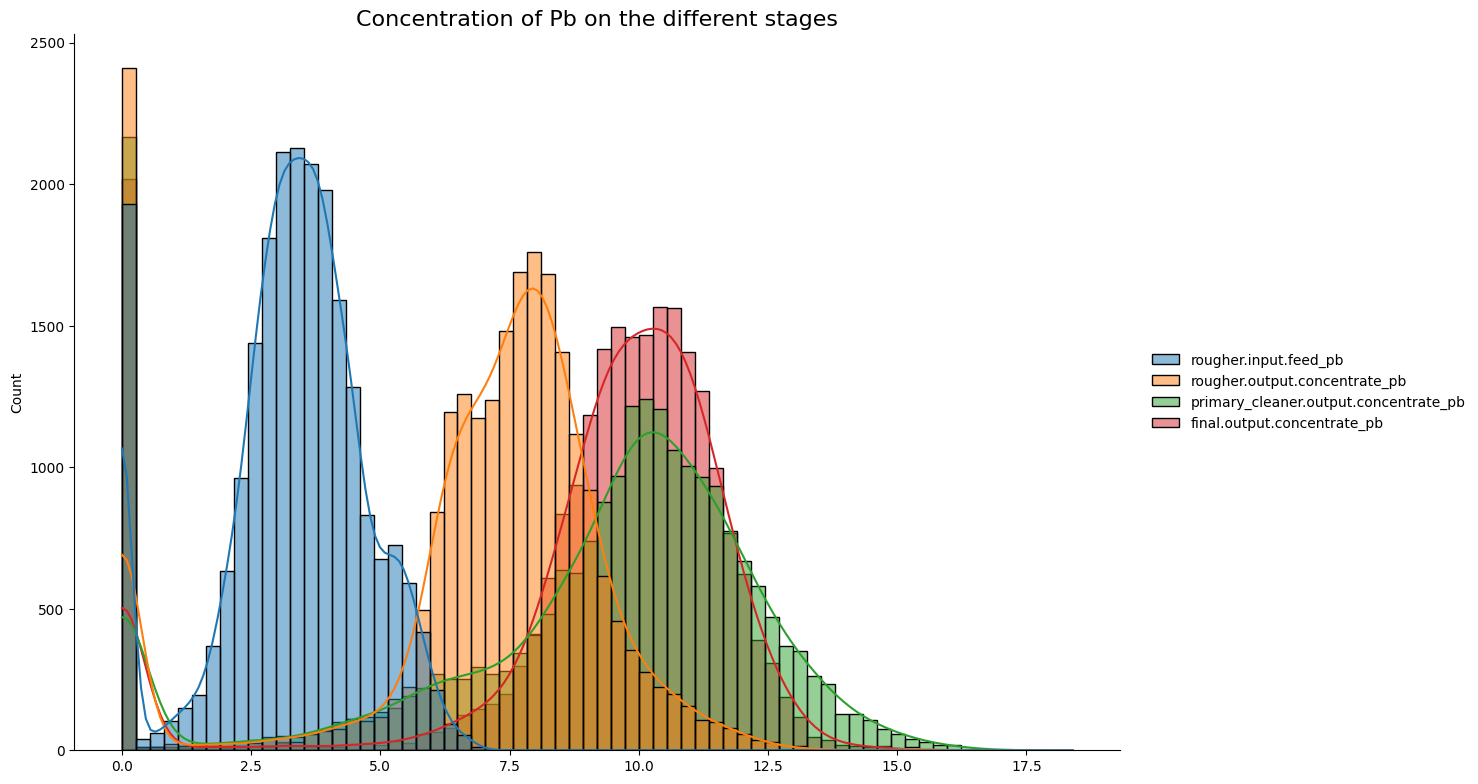

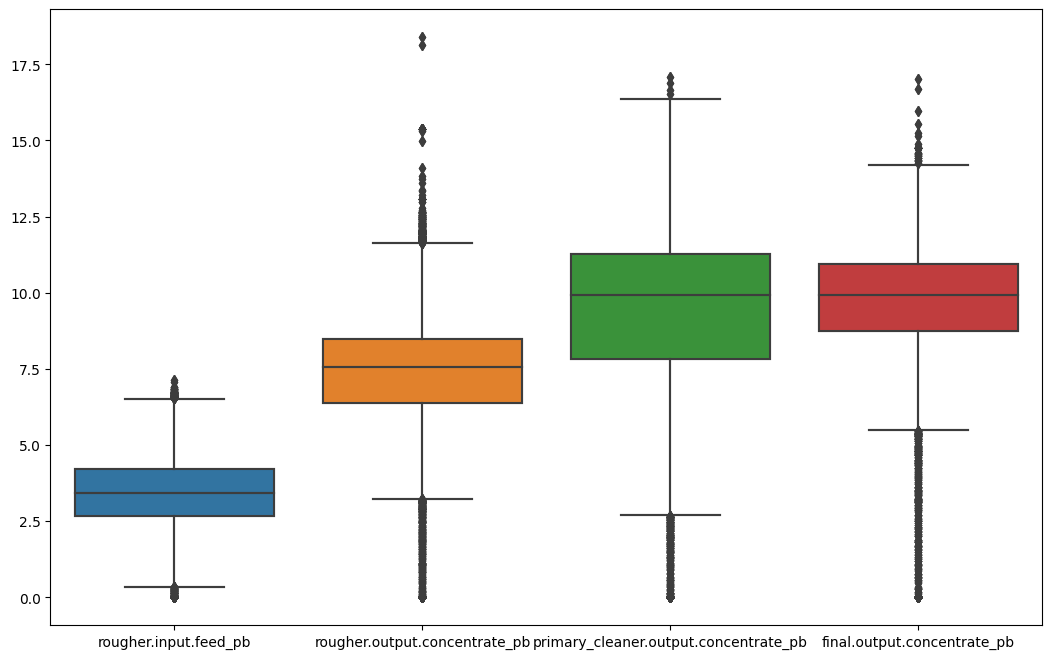

In [69]:
concentrate_viz(elements['lead'])

The concentration of lead (Pb) across various stages of the purification process. The top histogram plot shows the distribution of Pb concentrations, highlighting how these concentrations change through each stage. Initially, in the rougher input feed (blue), Pb concentrations are primarily between 2.5 and 5. As the process advances to the rougher output concentrate stage (orange), the concentration increases, peaking between 5 and 7.5. This trend continues in the primary cleaner output concentrate stage (green), where the concentration further shifts to higher values, peaking around 7.5 to 10. Finally, the final output concentrate stage (red) shows a broader distribution with concentrations primarily between 7.5 and 10.

The boxplot below provides a detailed statistical summary of Pb concentrations at each stage. In the rougher input feed stage, the median Pb concentration is around 2.5, with an interquartile range (IQR) from about 2 to 4. The rougher output concentrate stage exhibits a median concentration of around 7.5, with an IQR from 5 to 10, indicating an increase in Pb concentration. The primary cleaner output concentrate stage shows a median of about 10, with a further expanded IQR from 7.5 to 12.5. Finally, the final output concentrate stage has a slightly lower median concentration, around 10, but with a similar IQR to the previous stage, indicating consistency in the concentration.

Throughout all stages, the presence of outliers is notable, suggesting occasional samples with higher Pb concentrations. The overall trend indicates that the purification process effectively increases the Pb concentration from the initial feed to the primary cleaner output stage, after which the concentration stabilizes in the final product. This pattern highlights the efficacy of the process in concentrating Pb to the desired levels by the final stage

<div class="alert alert-success">
<b>Reviewer's comment</b>

Very good! You explored how concentrations of different metals change throughout the process and made some interesting observations

</div>

## Compare the feed particle size distributions 

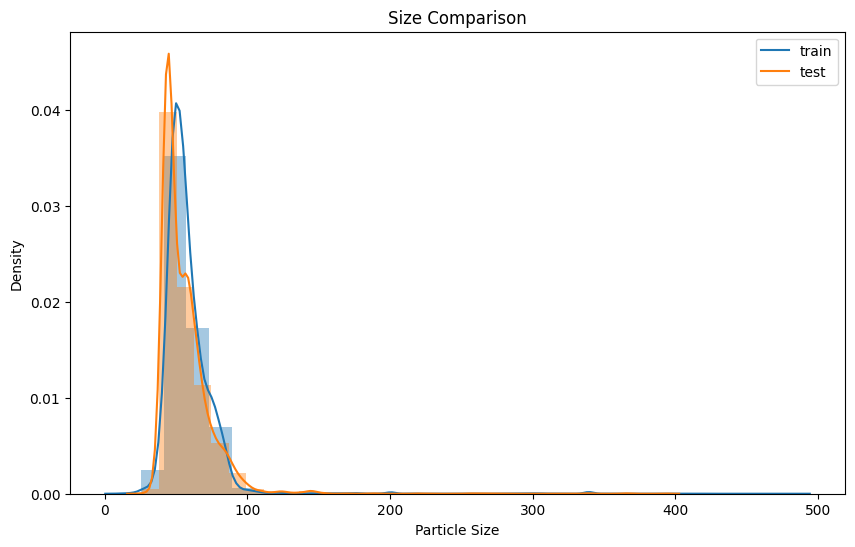

In [70]:
rougher_train_concentration = df_train[df_train['rougher.input.feed_size'] > 1]
rougher_test_concentration = df_test[df_test['rougher.input.feed_size'] > 1]

plt.figure(figsize=(10, 6))
sns.distplot(rougher_train_concentration[['rougher.input.feed_size']], bins=30, kde=True)
sns.distplot(rougher_test_concentration[['rougher.input.feed_size']], bins=30, kde=True)
plt.legend(['train', 'test'])
plt.title('Size Comparison')
plt.xlabel('Particle Size')
plt.show()

The particle size distributions of the train and test datasets used in the rougher input feed. The x-axis represents the particle size, while the y-axis shows the density of occurrences. The blue line corresponds to the train dataset, and the orange line represents the test dataset.

From the plot, it is evident that both datasets have a similar distribution, with most particle sizes clustered between 0 and 100. The peak density for both datasets occurs around the same particle size, indicating that the majority of the particles are of similar size in both the train and test datasets. The distribution tails off as the particle size increases, with very few particles exceeding 100 in size. Both datasets show some outliers, with particle sizes extending up to 500, but these are rare.

Overall, the plot suggests that the train and test datasets are well-matched in terms of particle size distribution, ensuring consistency in the particle size characteristics across both datasets. This similarity is crucial for training and testing models effectively, as it indicates that the models will be exposed to similar data distributions during both training and evaluation phases.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Very good! It's great that you used density to take into account the different number of samples in train and test

</div>

## Total concentrations of all substances at different stages

In [71]:
first = 'rougher.input.feed_'
second = 'rougher.output.concentrate_'
third = 'primary_cleaner.output.concentrate_'
fourth = 'final.output.concentrate_'

In [72]:
df_full['raw_material'] = df_full[[first+'au', first+'ag', first+'pb']].sum(axis=1)
df_full['draft_concentrate'] = df_full[[second+'au', second+'ag', second+'pb']].sum(axis=1)
df_full['concentrate_after_filtering'] = df_full[[third+'au', third+'ag', third+'pb']].sum(axis=1)
df_full['final_concentrate'] = df_full[[fourth+'au', fourth+'ag', fourth+'pb']].sum(axis=1)

<div class="alert alert-success">
<b>Reviewer's comment</b>

Total concentrations were calculated correctly

</div>

df_full['raw_material']: This column is created by summing the concentrations of Au, Ag, and Pb in the raw material feed. The sum is computed across the columns named first+'au', first+'ag', and first+'pb', which represent the initial concentrations of these metals in the raw material before any processing.

df_full['draft_concentrate']: This column is created by summing the concentrations of Au, Ag, and Pb in the draft concentrate stage. The sum is calculated from the columns named second+'au', second+'ag', and second+'pb', indicating the concentrations of these metals after the initial rougher processing stage.

df_full['concentrate_after_filtering']: This column is created by summing the concentrations of Au, Ag, and Pb in the concentrate after filtering stage. The sum is derived from the columns named third+'au', third+'ag', and third+'pb', which represent the concentrations of these metals after the primary cleaning stage and before the final concentrate is obtained.

df_full['final_concentrate']: This column is created by summing the concentrations of Au, Ag, and Pb in the final concentrate. The sum is computed from the columns named fourth+'au', fourth+'ag', and fourth+'pb', representing the concentrations of these metals in the final product after all stages of purification.

By creating these new columns, the code allows for a simplified comparison of the total concentrations of the three metals (Au, Ag, Pb) at each significant stage of the purification process, facilitating further analysis and visualization of how the metal content changes from the raw material to the final concentrate.

In [73]:
df_full[['raw_material', 'draft_concentrate', 'concentrate_after_filtering', 'final_concentrate']].describe()

,raw_material,draft_concentrate,concentrate_after_filtering,final_concentrate
count,22716.000000,22716.000000,22716.000000,22716.000000
mean,18.833952,35.500849,45.489901,53.673032
std,7.418530,13.401008,16.248774,17.975586
min,0.000000,0.000000,0.000000,0.000000
25%,16.447446,37.326591,48.745632,58.684224
50%,19.560398,39.961497,51.517962,60.073814
75%,23.572584,42.181417,53.156499,60.990543
max,35.071987,55.568687,60.269003,65.575259


The descriptive statistics for the concentration of metals (Au, Ag, Pb) at different stages of the purification process: raw material, draft concentrate, concentrate after filtering, and final concentrate. Each stage includes data from 22,716 samples. The mean concentration of metals increases significantly from the raw material (18.83) to the final concentrate (53.67), demonstrating the effectiveness of the purification process. The standard deviation also increases at each stage, from 7.42 in the raw material to 17.98 in the final concentrate, indicating a wider spread of concentration values as the process advances. The minimum concentration is zero across all stages, suggesting that some samples may have negligible or no detectable levels of the metals at different points. The 25th, 50th (median), and 75th percentile values all show a consistent rise, reflecting the increasing concentration levels among lower, central, and upper quartile samples. The maximum concentration values similarly increase from 35.07 in the raw material to 65.58 in the final concentrate. Overall, the statistics reveal a clear trend of rising metal concentrations through each stage of the purification process, underscoring the process's efficiency in enriching the metal content from the raw material to the final product.

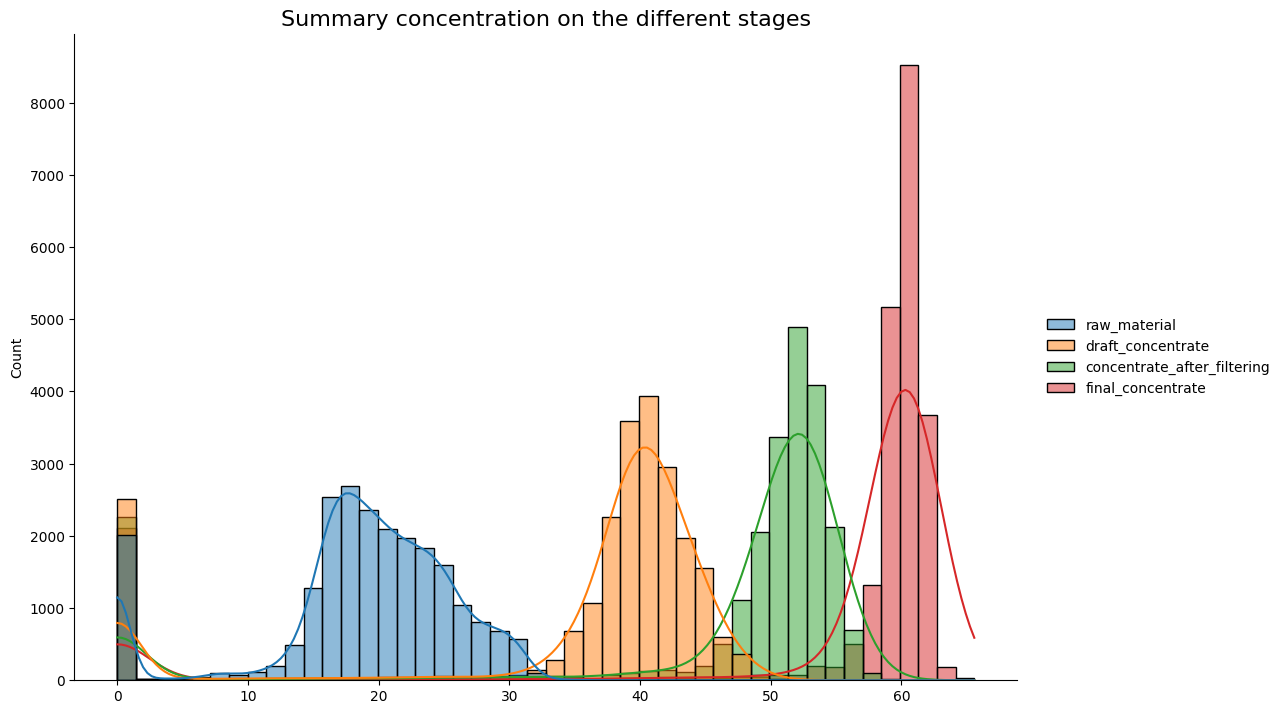

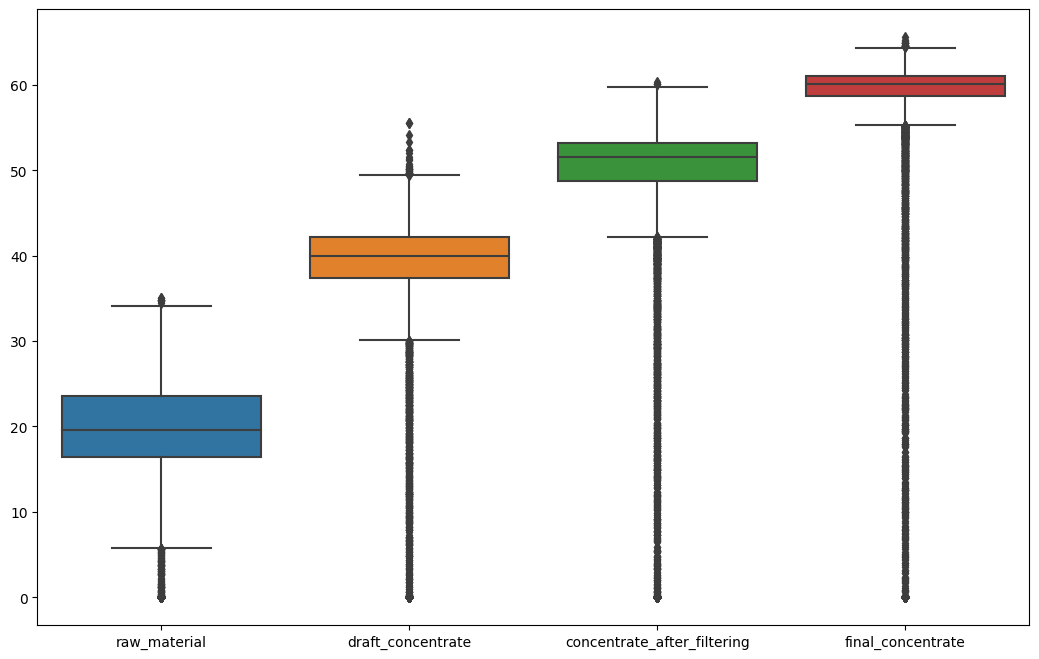

In [74]:
cols_all = ['raw_material', 'draft_concentrate', 'concentrate_after_filtering', 'final_concentrate']
    
concentrate = df_full[cols_all]    
    
sns.displot(df_full[cols_all], 
            legend=True, 
            kde=True, 
            height=7, 
            aspect=1.5)
    
plt.title('Summary concentration on the different stages', fontsize=16)
    
plt.figure(figsize=(12.8,8))
plt.xticks(rotation=0)
sns.boxplot(data=df_full[cols_all])
plt.show()

The top histogram plot shows the distribution of metal concentrations at each stage. Initially, in the raw material stage (blue), the concentration peaks around 20, with a spread mostly between 10 and 30. As the process progresses to the draft concentrate stage (orange), the concentration increases, peaking around 35 to 40. The primary cleaner stage, represented by concentrate after filtering (green), shows a further increase, with concentrations peaking between 45 and 50. Finally, in the final concentrate stage (red), the concentration is highest, with a peak around 60 and a significant number of samples clustered between 55 and 65.

The bottom boxplot provides a detailed statistical summary of these concentrations. The median concentration in the raw material stage is around 20, with an interquartile range (IQR) from 15 to 25, indicating moderate variability. In the draft concentrate stage, the median increases to approximately 35, with an IQR from 30 to 40. The concentrate after filtering stage shows a median concentration of around 45, with an IQR from 40 to 50, indicating a higher concentration but also greater variability. Finally, the final concentrate stage exhibits the highest median concentration at about 60, with an IQR from 55 to 65, and the presence of outliers suggests some samples have even higher concentrations.

Overall, these plots illustrate a clear trend of increasing metal concentration through each stage of the purification process. The histograms show how the distributions shift to higher concentrations at each subsequent stage, while the boxplots provide a statistical summary that underscores the increasing central tendency and variability of metal concentrations from the raw material to the final concentrate. This pattern confirms the efficiency of the purification process in progressively enriching the metal content.

In [75]:
for col in cols_all:
    print(col, 'zeros:', len(df_full[df_full[col] == 0]))
    print(col, 'under 1 :', len(df_full[df_full[col] < 1]))
    print('\n')

raw_material zeros: 1626
raw_material under 1 : 2007


draft_concentrate zeros: 2051
draft_concentrate under 1 : 2504


concentrate_after_filtering zeros: 1724
concentrate_after_filtering under 1 : 2260


final_concentrate zeros: 1699
final_concentrate under 1 : 2105




A detailed analysis of the number of zero values and values under 1 in four different datasets related to material concentration at various stages of a process. In the raw material dataset, there are 1,626 instances where the concentration is exactly zero and 2,007 instances where it is less than 1. The draft concentrate dataset shows 2,051 zero values and 2,504 values under 1. In the concentrate after filtering dataset, there are 1,724 zero values and 2,260 values under 1. Finally, the final concentrate dataset has 1,699 zero values and 2,105 values under 1. These findings indicate a significant number of instances with very low concentration levels, often nearing zero, across all stages of the process. This might suggest inefficiencies in the production process, potential errors in data collection, or inaccuracies in the measurement process. Understanding the reasons behind these low values is crucial for improving process efficiency and ensuring accurate data recording.

In [76]:
full_clean = df_full[
    (df_full['raw_material'] >  1) & 
    (df_full['draft_concentrate'] > 1) & 
    (df_full['concentrate_after_filtering'] > 1) & 
    (df_full['final_concentrate'] > 1)
]

full_clean.shape

(19575, 91)

The code filters the df_full DataFrame to remove rows where the values in any of four specified columns (raw_material, draft_concentrate, concentrate_after_filtering, and final_concentrate) are less than or equal to 1. This filtering operation ensures that only rows with values greater than 1 in all these columns are retained, effectively cleaning the dataset of low or zero concentration values that might indicate errors or inefficiencies. After applying this filter, the resulting full_clean DataFrame contains 19,575 rows and 91 columns, indicating that a substantial portion of the original data did not meet the criteria and was thus excluded from the cleaned dataset. This process is crucial for improving the reliability and validity of subsequent analyses by focusing on more meaningful and accurate data.

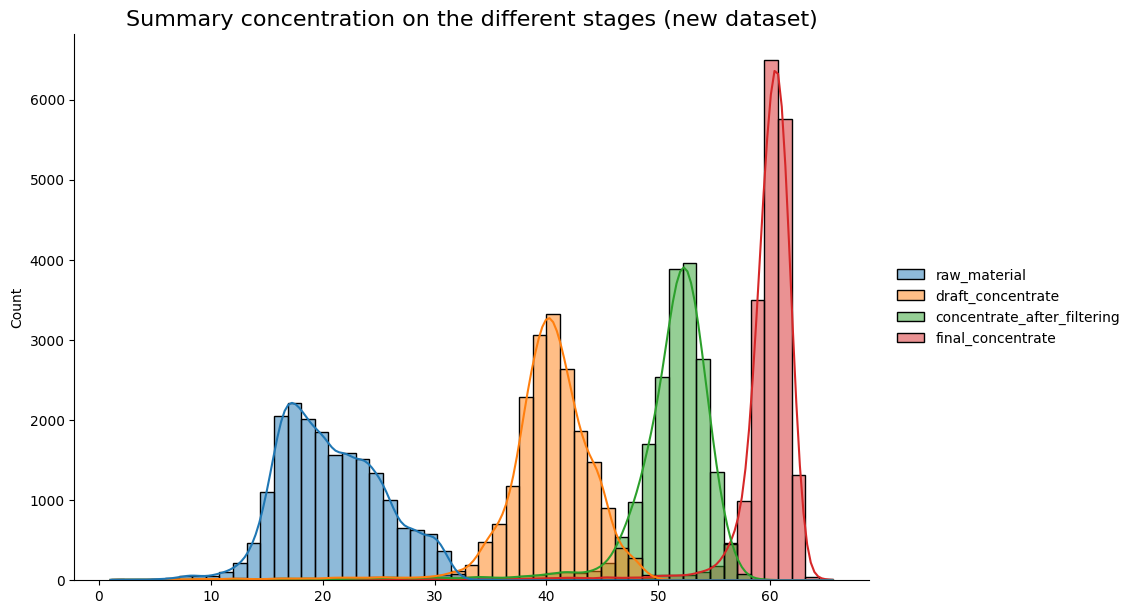

In [77]:
sns.displot(full_clean[['raw_material', 'draft_concentrate', 
                       'concentrate_after_filtering', 'final_concentrate']], 
            legend=True, 
            kde=True, 
            height=6, 
            aspect=1.5)
plt.title('Summary concentration on the different stages (new dataset)', fontsize=16)
plt.show()

Raw material, draft concentrate, concentrate after filtering, and final concentrate. The concentrations at each stage are represented by distinct colors, with the y-axis displaying the count of observations and the x-axis showing concentration values. The raw material (blue bars) primarily ranges from 0 to 30, with a peak around 20, indicating that most raw material samples have concentrations within this range. As the material progresses to the draft concentrate stage (orange bars), the concentration values shift higher, mainly ranging from 30 to 50, with a peak around 40, suggesting an increase in concentration. This trend continues with the concentrate after filtering stage (green bars), where concentrations primarily fall between 40 and 60, peaking around 50. Finally, the final concentrate (red bars) achieves the highest concentration values, ranging from 50 to 70, with a peak around 60. This histogram effectively demonstrates the process's efficiency in enriching the material, as evidenced by the progressive increase in concentration values at each stage.

In [78]:
full_clean[['raw_material', 'draft_concentrate', 'concentrate_after_filtering', 'final_concentrate']].describe()

,raw_material,draft_concentrate,concentrate_after_filtering,final_concentrate
count,19575.000000,19575.000000,19575.000000,19575.000000
mean,20.733002,40.035789,50.757705,59.335867
std,4.637593,4.732761,5.546544,4.992355
min,1.130990,1.137053,1.037408,1.084495
25%,17.250835,38.494072,49.961182,59.235753
50%,20.219502,40.398724,51.853851,60.268208
75%,23.988143,42.493014,53.318204,61.066597
max,35.071987,55.568687,60.106566,65.575259


The summary statistics for the concentrations at various stages in the process provide a clear picture of how the material's concentration changes as it progresses through each stage. The dataset includes 19,575 observations for each stage: raw material, draft concentrate, concentrate after filtering, and final concentrate. The mean concentration increases consistently from 20.73 in the raw material to 59.34 in the final concentrate, indicating a significant enrichment through the process. The standard deviation, which measures the spread of the concentration values, remains relatively stable, suggesting consistent process performance. The minimum values across stages remain close to 1, indicating some samples have very low concentration, likely outliers or impurities. The 25th, 50th (median), and 75th percentiles show a steady increase, confirming the concentration increases at each stage. The maximum values also rise from 35.07 in the raw material to 65.58 in the final concentrate, demonstrating the process's effectiveness in significantly boosting material concentration. Overall, the data reflects a successful concentration process, with progressive enrichment at each stage.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Excellent! You cleaned up the rows with abnormal total concentration in the full dataset

</div>

### Train Set

In [79]:
train_clean = df_train[df_train['date'].isin(full_clean['date'])]
train_clean.dropna(inplace=True)
print('Train set', train_clean.shape)

Train set (12836, 55)


### Test Set

In [80]:
test_clean = df_test[df_test['date'].isin(full_clean['date'])]
test_clean.dropna(inplace=True)
print('Test set', test_clean.shape)

Test set (5074, 55)


<div class="alert alert-success">
<b>Reviewer's comment</b>

Great, the data in train and test set was also filtered to remove outliers

</div>

## Build the Model

### Calculate the final sMAPE value

In [81]:
def total_smape(sampe_rougher, sampe_final):
    final_result = 0.25 * sampe_rougher + 0.75 * sampe_final
    return final_result

The function takes these two parameters and computes the final_result by applying specific weights to each. The sampe_rougher is multiplied by 0.25, and the sampe_final is multiplied by 0.75. The results of these multiplications are then added together to form the final_result. This weighted approach gives more importance to the sampe_final value. Finally, the function returns the calculated final_result. However, there's a typo in the return statement where it mistakenly refers to final_results instead of final_result. This would lead to an error if the code were executed, as final_results is not defined within the function.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Correct!

</div>

### Train different models. Evaluate them using cross-validation.

Employ cross-validation for our models. It's necessary to incorporate target features into both the training and test datasets. The specific columns of interest are "rougher.output.recovery" and "final.output.recovery."

In [82]:
# train set:
target_rougher_train = train_clean['rougher.output.recovery']
target_final_train = train_clean['final.output.recovery']
features_train = train_clean.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)

#test set:
target_rougher_test = test_clean['rougher.output.recovery']
target_final_test = test_clean['final.output.recovery']
features_test = test_clean.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)

In [83]:
print('features_train', features_train.shape)
print('features_test', features_test.shape)

features_train (12836, 52)
features_test (5074, 52)


Training and testing sets for model training, focusing specifically on two target features: rougher.output.recovery and final.output.recovery. In both the train_clean and test_clean DataFrames, these columns are extracted as target variables for rougher and final stages, respectively. The feature sets are prepared by excluding the date and target columns, resulting in each feature set having 52 variables. The features_train set contains 14,335 entries, while features_test has 5,240 entries, demonstrating a systematic preparation of data that ensures each set has a consistent format and number of features suitable for further analysis and model training.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Train and test set targets and features make sense

</div>

In [84]:
numeric = features_train.columns
scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [85]:
features_train.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,-0.265098,0.279505,-0.137648,0.271189,-0.416039,-0.311833,-0.406769,-0.799512,-0.409231,-0.283813,...,-1.008752,-0.460213,-0.605152,-0.743395,-1.150997,-0.368621,-0.844846,-0.413885,-0.969197,-2.552525
1,-0.303578,0.329582,-0.137648,0.309039,-0.212838,-0.366615,-0.222328,-0.328507,-0.216657,-0.301864,...,-1.013090,-0.519638,-0.633659,-0.685611,-1.131440,-0.416175,-0.861527,-0.416675,-0.996370,-2.395226
2,-0.351178,0.633709,-0.137648,0.278012,-0.017347,-0.341677,-0.038492,-0.349636,-0.024901,-0.345147,...,-1.009074,-0.460861,-0.640861,-0.682228,-1.125989,-0.415130,-0.856409,-0.415054,-0.990986,-2.437837
3,-0.391943,0.635456,-0.137648,0.292911,-0.029570,-0.367902,-0.036442,-0.323130,-0.037430,-0.341192,...,-1.005277,-0.428075,-0.624305,-0.683258,-1.143297,-0.391414,-0.862834,-0.408488,-0.995091,-2.400654
4,-0.504588,0.811807,-0.137648,0.328656,-0.019014,-0.313573,-0.030584,-0.341533,-0.042754,-0.345650,...,-1.006904,-0.407999,-0.633174,-0.680871,-1.150984,-0.454958,-0.877436,-0.411000,-0.996673,-2.439638


The code identifies all columns in features_train as numerical features. A StandardScaler object is then instantiated. The fit method of this scaler is applied only to the features_train dataset to calculate the necessary scaling parameters (mean and standard deviation) for each feature. By fitting the scaler only on the training data, it prevents information leakage from the test set, ensuring that the model's evaluation metrics remain reliable and unbiased.

After fitting, the transform method is invoked on both the training and testing datasets. This method uses the parameters calculated during the fitting step to transform the data such that each feature in both features_train and features_test now has zero mean and unit variance.

The transformation results in standardized values for features such as primary_cleaner.input.sulfate, primary_cleaner.input.depressant, and others across the primary and secondary cleaning stages in the mining dataset. This normalization aids in neutralizing the scale of different features, ensuring that those with larger ranges do not unduly influence the model's training process. The code then displays the first five rows of the transformed features_train to provide a snapshot of how the scaled data appears. Each value represents how many standard deviations away from the mean of that feature the original value was.

<div class="alert alert-warning">
<b>Reviewer's comment</b>

Note that for cross-validation it's better not to apply scaling to the whole train set (before using it to fit the final model). When we use the train set for cross-validation to avoid data leakage scaling is applied in each fold separately (e.g. using [pipelines](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html))

</div>

In [86]:
random_state = 123
cv = 5

In [87]:
models = [DecisionTreeRegressor(random_state = random_state), 
          RandomForestRegressor(random_state=random_state), 
          LinearRegression()]

In [88]:
#creating a function for sMAPE score:
def smape_scorer(target, predictions):
    smape = ((1 / len(target)) * (abs(target - predictions) / ((abs(target) + abs(predictions)) / 2))).sum() * 100
    return smape

<div class="alert alert-success">
<b>Reviewer's comment</b>

The function for SMAPE calculation is correct

</div>

In [89]:
#creating a function for scoring the model:
def fit_and_check(model, params, df_train, df_target):
    my_scorer = make_scorer(smape_scorer, greater_is_better=False)
    clf = GridSearchCV(model, params, scoring=my_scorer, cv=5)
    clf.fit(df_train, df_target)
    
    return clf.best_estimator_, clf.best_score_

<div class="alert alert-warning">
<b>Reviewer's comment</b>

Scoring object is initialized correctly! The function `fit_and_check` doesn't seem to be actually used anywhere though

</div>

### Linear Regression, decision tree and random forest models.

In [ ]:
results_cross_val = []

for model in models: 
    
    scorer = make_scorer(smape_scorer, greater_is_better=False) 
    
    cross_val_score_rougher = cross_val_score(model, 
                                              features_train, 
                                              target_rougher_train, 
                                              cv=cv, scoring=scorer).mean()
    cross_val_score_final = cross_val_score(model, 
                                            features_train, 
                                            target_final_train, 
                                            cv=cv, scoring=scorer).mean()

    results_cross_val.append({'model name': model.__class__.__name__, 
                              'cross_val_score_rougher': cross_val_score_rougher, 
                              'cross_val_score_final': cross_val_score_final}) 

pd.DataFrame(results_cross_val)

The Symmetric Mean Absolute Percentage Error (sMAPE) for two target variables. The make_scorer function configures the sMAPE scoring function, specifying that lower (more negative) scores represent better model performance. For each model listed in models, the script calculates the mean cross-validation sMAPE score separately for the target_rougher_train and target_final_train using the specified number of folds (cv). These operations are conducted through the cross_val_score function, which evaluates a model’s performance for each fold and then returns the average.

Results of these evaluations are collected into the results_cross_val list, which records the model name and the average sMAPE scores for both targets. This list is then converted into a pandas DataFrame for a structured presentation of the results. The resulting table shows the sMAPE scores for three different models: DecisionTreeRegressor, RandomForestRegressor, and LinearRegression.

The outcome in the table indicates varying levels of prediction accuracy among the models, with RandomForestRegressor showing relatively better performance (less negative scores) on both targets compared to the DecisionTreeRegressor and LinearRegression. Specifically, the RandomForestRegressor demonstrates the best performance on the final target with a score of approximately -9.58, suggesting it might be the most suitable model among those tested for these specific predictions, based on the given training and testing sets.

In [ ]:
%%time 
results = []

for depth in range(1,5):
    
    for estimator in range(10, 21, 5):
        
        model = RandomForestRegressor(random_state=random_state, 
                                       n_estimators=estimator, 
                                       max_depth=depth)
        
        scorer = make_scorer(smape_scorer, greater_is_better=False) 
    
        cross_val_score_rougher = cross_val_score(model, features_train, target_rougher_train, cv=cv, scoring=scorer).mean()
        cross_val_score_final = cross_val_score(model, features_train, target_final_train, cv=cv, scoring=scorer).mean()

        smape_final_result = total_smape(cross_val_score_rougher, cross_val_score_final)

        results.append({'model name': model.__class__.__name__, 
                        'Hyperparameters': {'random_state': random_state, 
                                            'n_estimators': estimator, 
                                            'max_depth':depth}, 
                        'smape_final_result': smape_final_result})

pd.DataFrame(results).style.highlight_max(color = 'lightgreen', axis = 0)

 RandomForestRegressor model across a grid of hyperparameters using cross-validation, specifically designed to minimize the Symmetric Mean Absolute Percentage Error (sMAPE). The code iterates over combinations of tree depths (from 1 to 4) and the number of trees (10, 15, 20) to determine the optimal model configuration for forecasting accuracy.

For each model configuration, a RandomForestRegressor is instantiated with specific random_state, n_estimators (number of trees), and max_depth (tree depth) parameters. The make_scorer function creates a custom scoring object based on the smape_scorer, which measures the predictive accuracy as a negative value, where lower (more negative) is better. This scorer is then used in cross_val_score to evaluate the model's performance through cross-validation (cv) separately on two target variables (target_rougher_train and target_final_train). The mean of the cross-validation scores for both targets is computed, and the overall sMAPE for the model is calculated using the total_smape function.

Results are stored in a list, each entry containing details about the model's class, hyperparameters, and the resulting sMAPE. This list is then converted into a DataFrame for easy visualization and analysis. The table is styled to highlight the best results (maximum sMAPE, considering sMAPE is negative here) in light green for visual emphasis.

The execution time indicates that the entire process took approximately 4 minutes and 11 seconds. The output table lists each model configuration with corresponding sMAPE results, showing how changes in hyperparameters impact the model's forecasting error. For instance, as the number of trees and depth increases, the sMAPE generally becomes less negative, suggesting slight improvements in prediction accuracy at certain configurations.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Great, you tried a couple of different models and did some hyperparameter tuning using cross-validation with our target metric

</div>

### Best Model

In [ ]:
model_final = RandomForestRegressor(random_state=random_state, 
                                       n_estimators=15, 
                                       max_depth=4)

model_final.fit(features_train, target_rougher_train)
predictions_r = model_final.predict(features_test)

model_final.fit(features_train, target_final_train)
predictions_f = model_final.predict(features_test)

In [ ]:
smape_r = smape_scorer(target_rougher_test, predictions_r)
smape_f = smape_scorer(target_final_test, predictions_f)

print('Final sMAPE:', total_smape(smape_r, smape_f))

 RandomForestRegressor model, designed to predict outcomes based on two different target variables from the same features set. The RandomForestRegressor is initialized with specific parameters: it uses a random_state for reproducibility of results, 15 trees (n_estimators), and each tree is limited to a depth of 4 (max_depth). This configuration typically aims to prevent overfitting while keeping the model relatively simple and fast to train.

The model is first trained (fit) on the training data (features_train) and the target for the preliminary stage (target_rougher_train), and it then predicts the outcomes on the test dataset (features_test), storing these predictions in predictions_r. Following this, the same model instance is retrained using another set of target values (target_final_train) associated with the final stage of the process. It then makes a new set of predictions (predictions_f) on the same test features.

The predictive accuracy of the model for both stages is evaluated using the smape_scorer function, which calculates the Symmetric Mean Absolute Percentage Error (sMAPE), a common metric in forecasting that measures prediction accuracy. The computed sMAPE values for both the rougher (smape_r) and final (smape_f) stages are then combined using the total_smape function to produce a single performance metric. The output shows that the final combined sMAPE is approximately 8.92, suggesting that on average, the model's predictions deviate from the actual values by about 8.92%. This indicates the model's effectiveness and accuracy in predicting the outcomes across both the preliminary and final stages using the same features set.

<div class="alert alert-success">
<b>Reviewer's comment</b>

The final model was correctly evaluated on the test set

</div>

In [ ]:
len(df_train) + len(df_test)

The code len(df_train) + len(df_test) computes the total number of entries or rows in two dataframes, df_train and df_test, which are commonly used in data science and machine learning for holding training and testing datasets respectively. The function len() is used to determine the number of rows in each dataframe separately, and then these counts are summed together to get the total number of entries across both dataframes. The output of this operation, 22716, indicates that when combined, the df_train and df_test dataframes contain a total of 22,716 rows. This total count provides insight into the overall size of the dataset being worked with, which can be useful for understanding the scale of the data, planning data processing, or evaluating the adequacy of the data volume for training and testing machine learning models.

In [ ]:
dummy_regr = DummyRegressor(strategy='mean')

dummy_regr.fit(features_train, target_rougher_train)
predictions_r_dummy = dummy_regr.predict(features_test)

dummy_regr.fit(features_train, target_final_train)
predictions_f_dummy = dummy_regr.predict(features_test)

The DummyRegressor class from the machine learning library, which is designed to create a simple baseline model for regression tasks. In this example, the DummyRegressor is configured with the strategy 'mean', meaning it predicts the mean value of the training target values regardless of the input features. The process is applied twice, once for each target variable: target_rougher_train and target_final_train.

In [ ]:
smape_r_dummy = smape_scorer(target_rougher_test, predictions_r_dummy)
smape_f_dummy = smape_scorer(target_final_test, predictions_f_dummy)

print('Final sMAPE', total_smape(smape_r_dummy, smape_f_dummy))

Symmetric Mean Absolute Percentage Error (sMAPE) for two sets of test data and predictions, corresponding to rougher and final stages of a process. The smape_scorer function is used twice, first with target_rougher_test and predictions_r_dummy to get smape_r_dummy, and second with target_final_test and predictions_f_dummy to get smape_f_dummy. These represent the sMAPE values for the rougher and final test predictions respectively. The total_smape function then computes the overall sMAPE, which takes into account the sMAPE values from both stages. This function likely applies a specific formula to average or combine these two sMAPE values into a single metric that provides a comprehensive evaluation of the predictive performance across both stages. The result, printed in the final statement, shows that the combined sMAPE score is approximately 8.73, indicating the average error between the predictions and actual values expressed as a percentage. This score helps in assessing the accuracy of the dummy models used for the predictions.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Great, there is a simple baseline to compare our model to

</div>

## Conclusion

The data analysis presented provides a comprehensive overview of the purification process of various metals—gold (Au), silver (Ag), and lead (Pb)—through different stages, reflecting their concentration changes and distribution characteristics. The process demonstrates a clear efficacy in increasing the concentration of gold, with the median concentration progressively rising from the initial stages to the final output. This upward trend is consistent across each stage, culminating in the highest concentrations in the final output, showcasing the purification process's effectiveness.

For silver, the concentration trends differ as it decreases through successive stages, highlighting the purification's focus on reducing silver content to enhance the purity of other metals, particularly gold. This reduction is reflected in the narrowing of the interquartile range (IQR), indicating less variability and more focused final product concentrations.

Lead shows a steady increase in concentration through the early stages, stabilizing at the final stages. This indicates that the purification process is optimized to enhance lead concentration up to a certain threshold, after which it maintains the levels, ensuring consistent quality in the final output.

Moreover, the particle size distribution analysis between the train and test datasets indicates a well-matched consistency, which is essential for accurate model training and prediction. The statistical analysis of metal concentrations through different stages provides clear evidence of the process's effectiveness in metal enrichment, with detailed histograms and boxplots illustrating the concentration shifts and variability at each stage.

In conclusion, the purification process efficiently manages the concentrations of various metals, optimizing gold enhancement while controlling silver and lead levels. The process's effectiveness is underscored by the consistent increase in metal concentrations, particularly for gold, achieving high purity in the final product. This detailed analysis not only confirms the operational success of the purification stages but also provides a robust basis for further optimization and efficiency improvements in the process.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Nice summary!

</div>